In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Visualization library

## Data Pre-processing

A rigorous process of statistical analysis and data pre-processing is indispensable when choosing a dataset. This proposal outlines a systematic approach to scrutinize the dataset, handle anomalies, and transform features, ultimately laying a robust foundation for applying selected classifiers.

Before we proceed, we provide a description of what each of the features represent:

1. Age
2. Gender
3. BMI (Body Mass Index)
4. SBP (Systolic Blood Pressure)
5. DBP (Diastolic Blood Pressure)
6. FPG (Fasting Plasma Glucose)
7. FFPG (Final Fasting Plasma Glucose)
8. Cholestrol
9. Triglyceride
10. HDL (High-Density Lipoprotein)
11. LDL (Low-Density Lipoprotein)
12. ALT (Alanine Aminotransferase)
13. BUN (Blood urea nitrogen)
14. CCR (Creatinine Clearance)
15. Smoking Status
16. Drinking Status
17. Family History of Diabetes
18. Diabetes - $\textbf{Class label}$

### Descriptive Statistics

We will begin by calculating descriptive statistics—namely, the mean, median, mode, variance, and standard deviation—to understand the central tendency, distribution spread, and shape of the features in our dataset

In [28]:
df = pd.read_csv(f"diabetes.csv")

# Compute the descriptive statistics for the dataset
summary = df.describe()

# Calculate Q1, Q3 and the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Append Q1 and Q3 to the summary
summary.loc['Q1'] = Q1
summary.loc['Q3'] = Q3
summary.loc['IQR'] = IQR

summary

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_history,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000
Q1,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
Q3,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000


### Frequency Distribution of the features

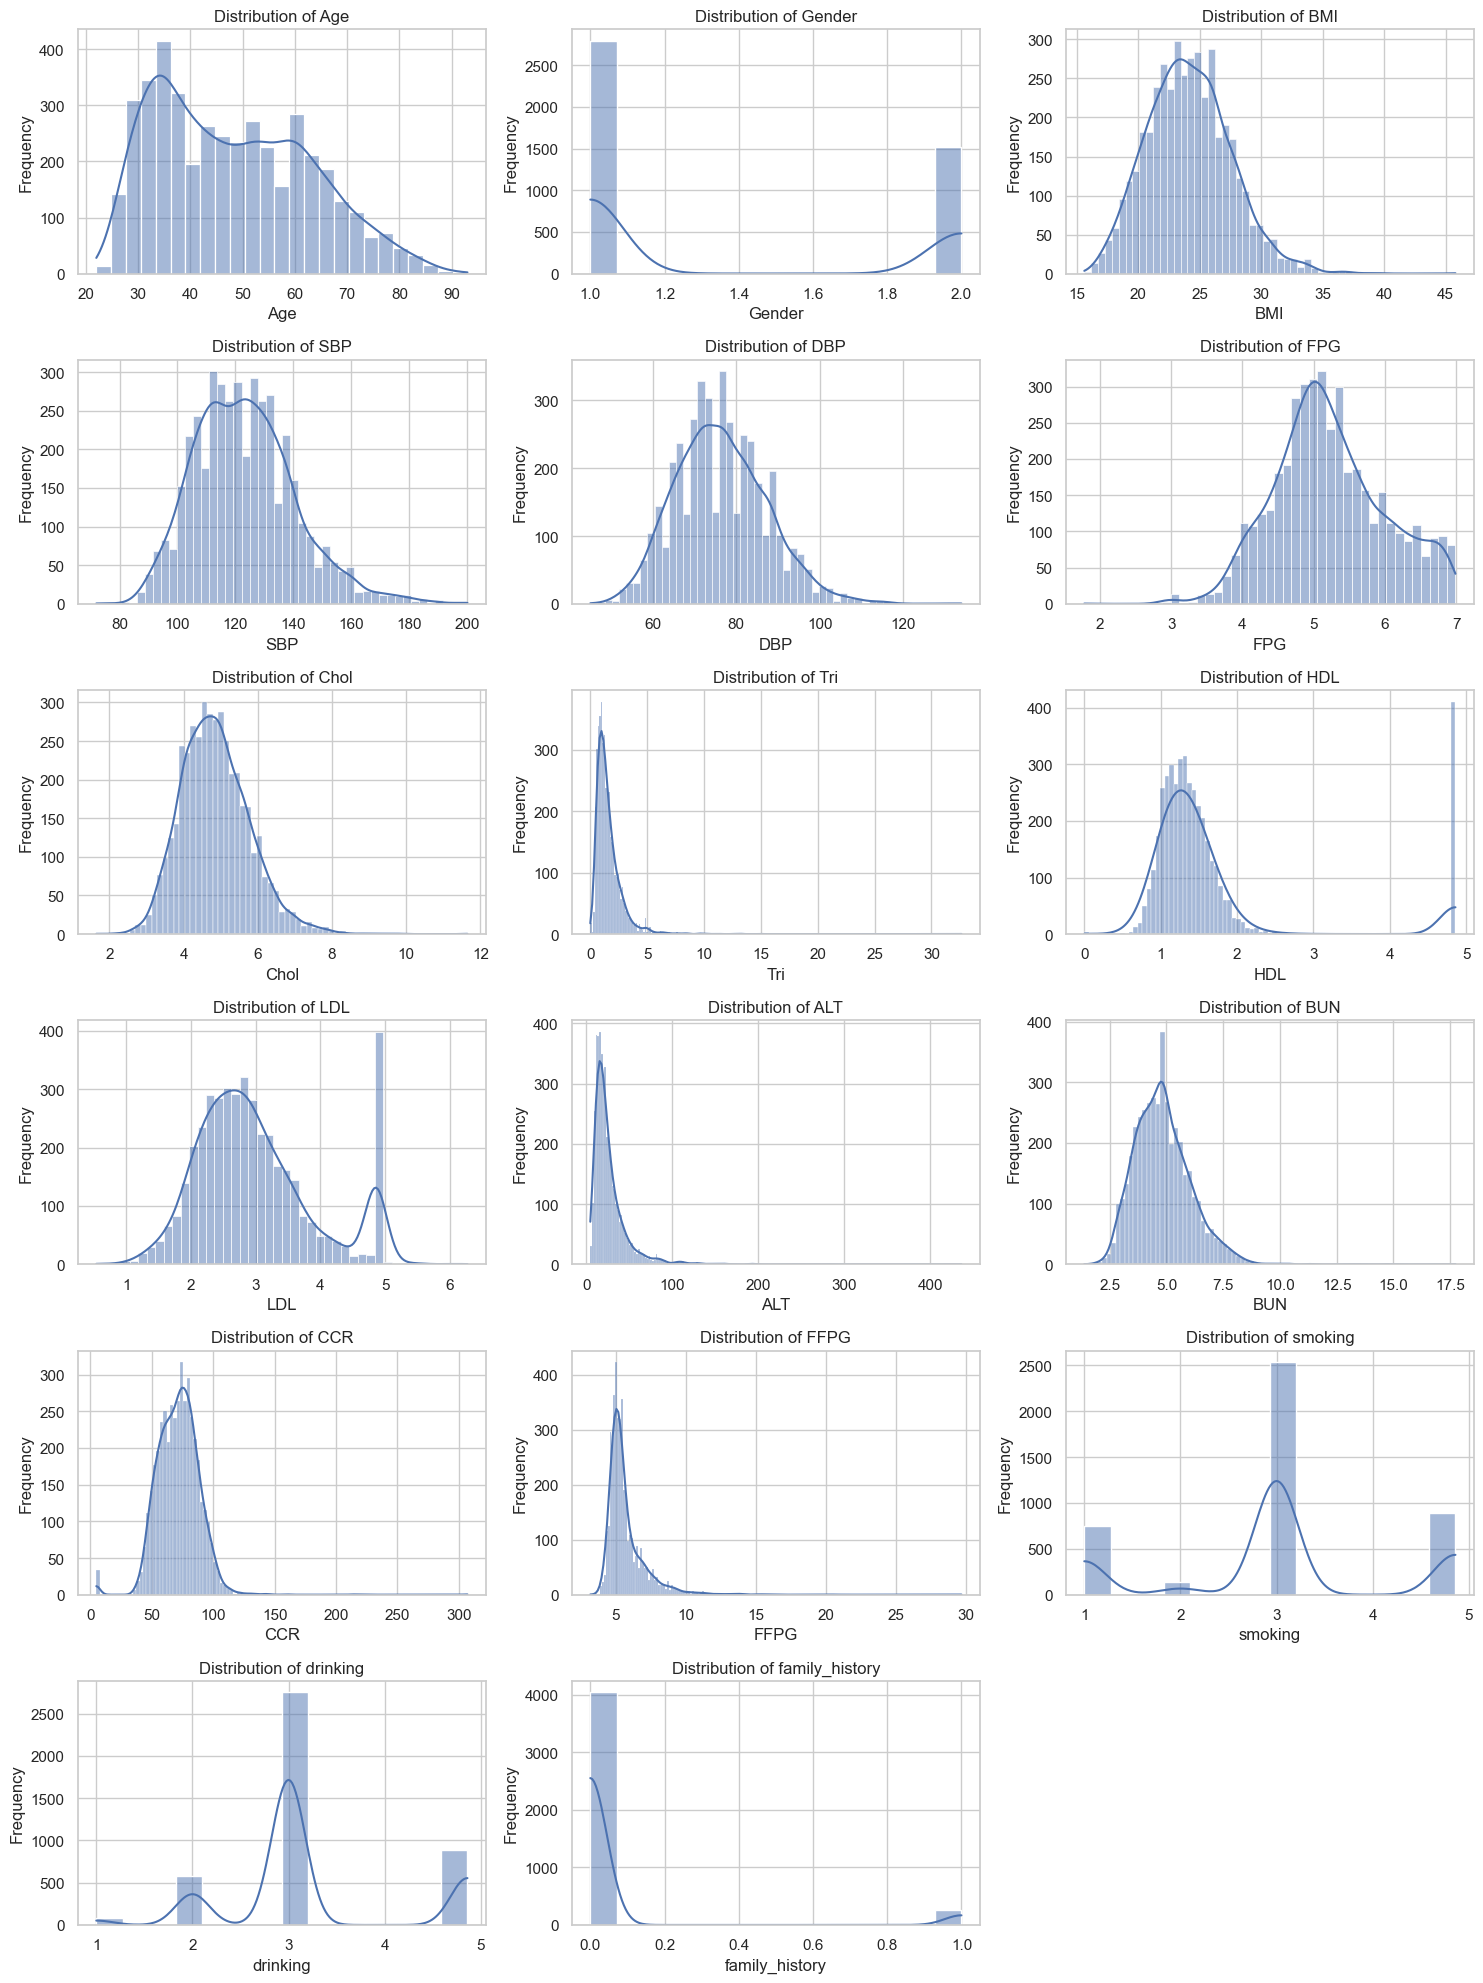

In [35]:
# Get the list of feature columns (excluding the class label)
feature_columns = df.columns[:-1]

# Create a 6x3 grid of distribution plots for features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Outlier Analysis

Outliers can significantly skew results. We will employ box plots and IQR methods to visualize and treat outliers, ensuring the model’s resilience to anomalous inputs.

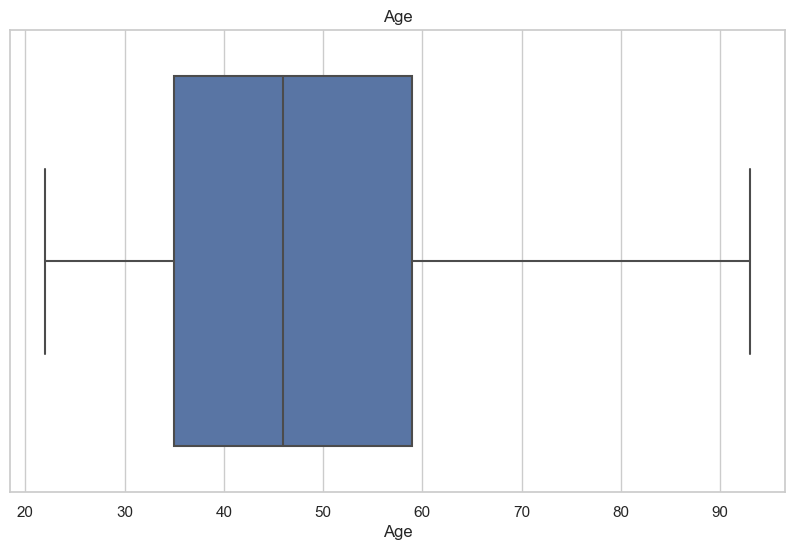

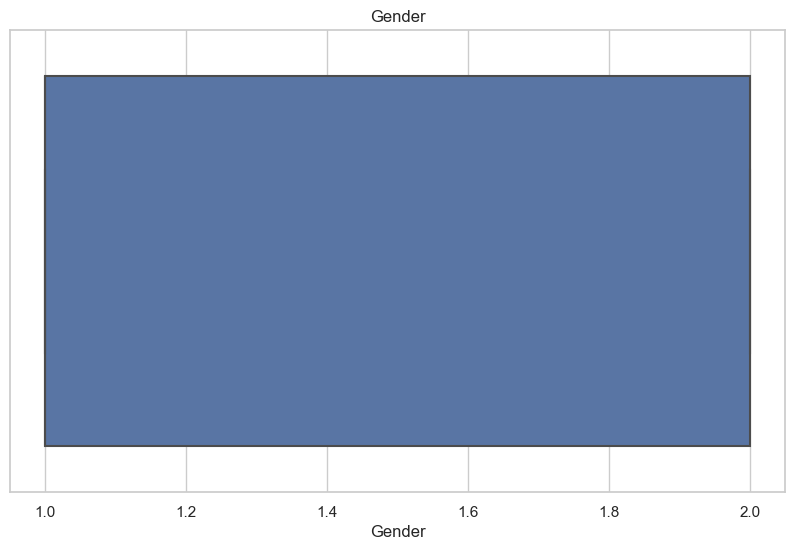

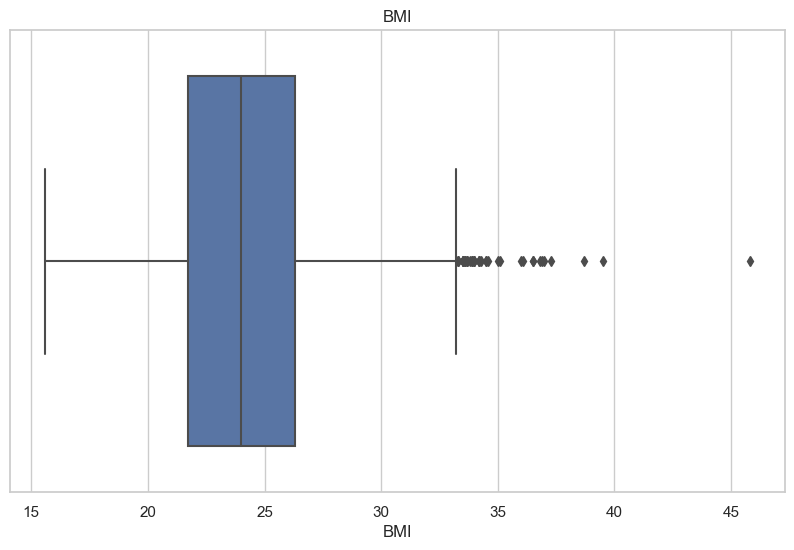

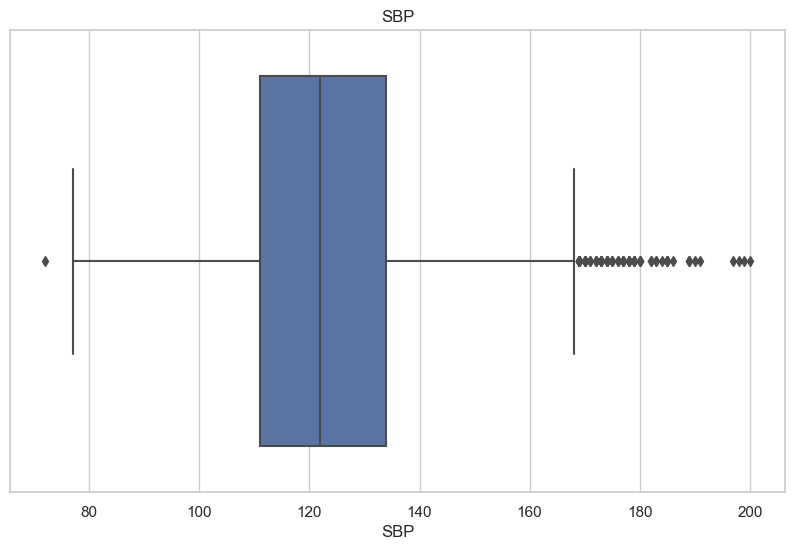

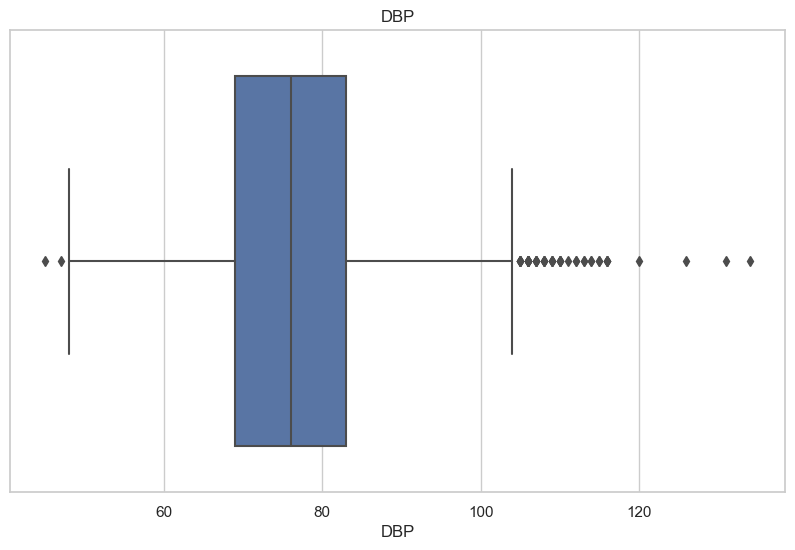

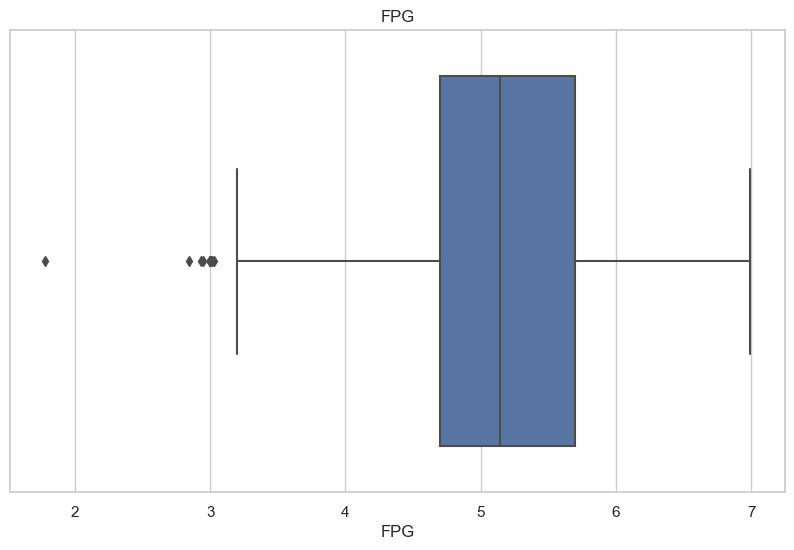

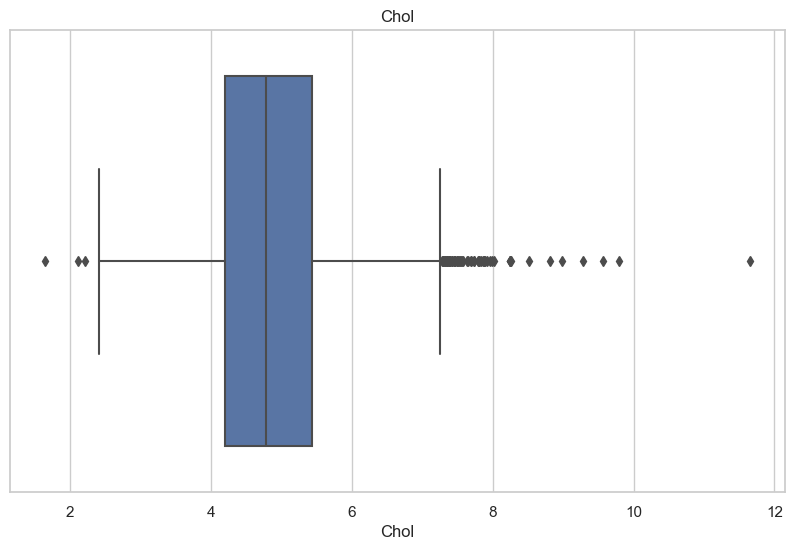

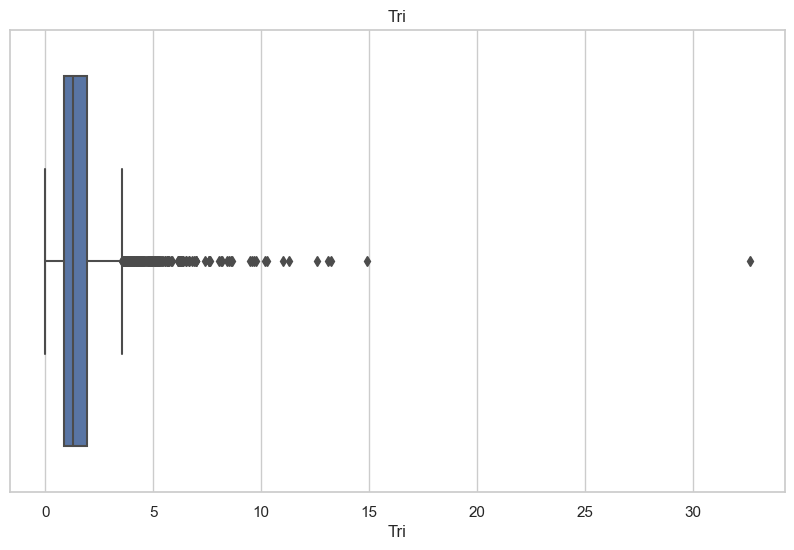

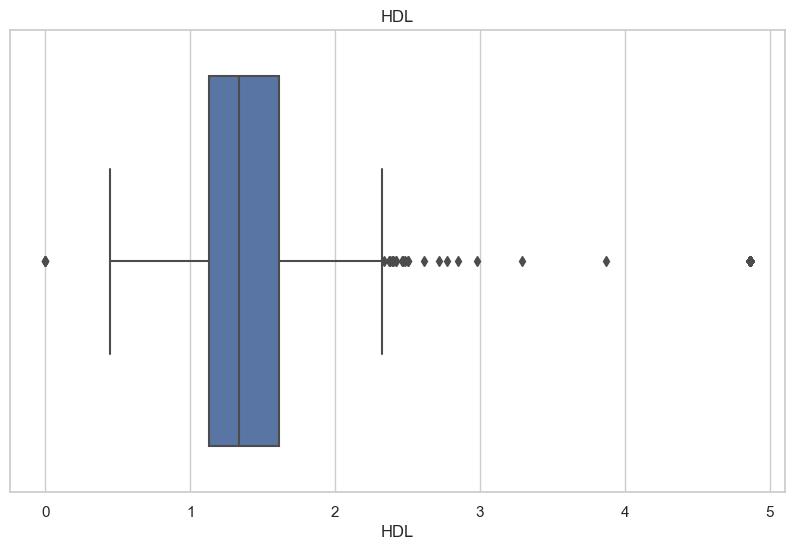

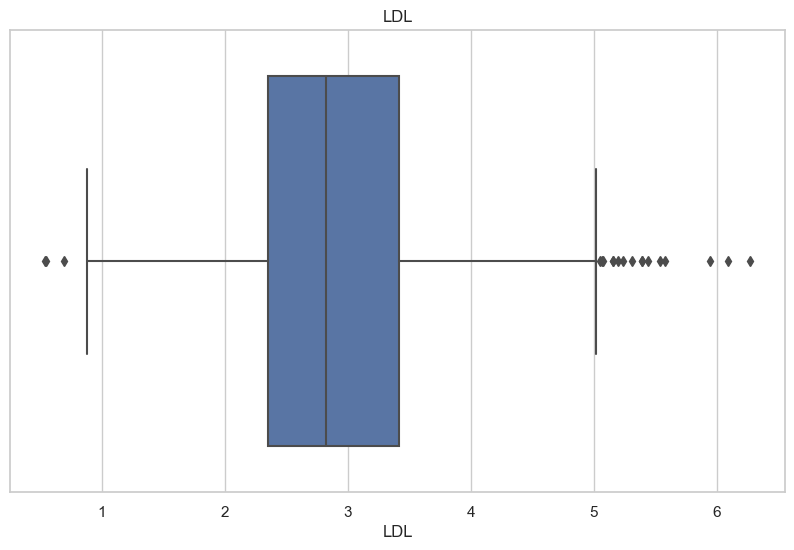

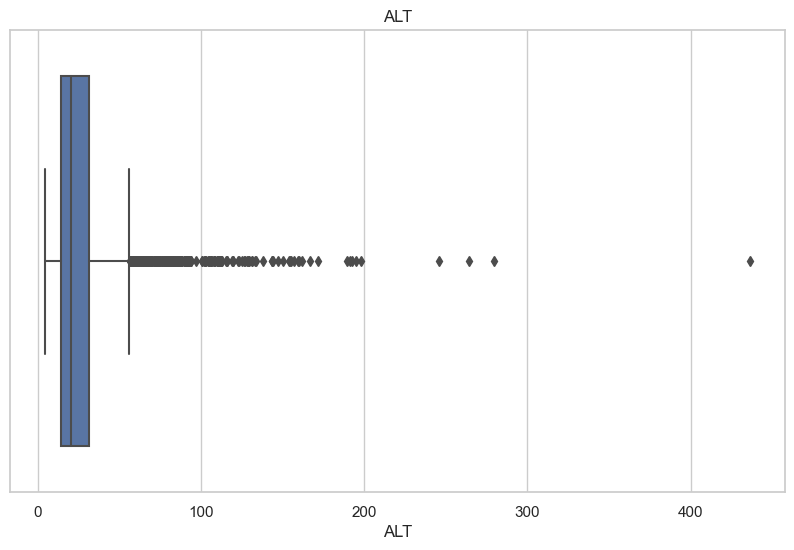

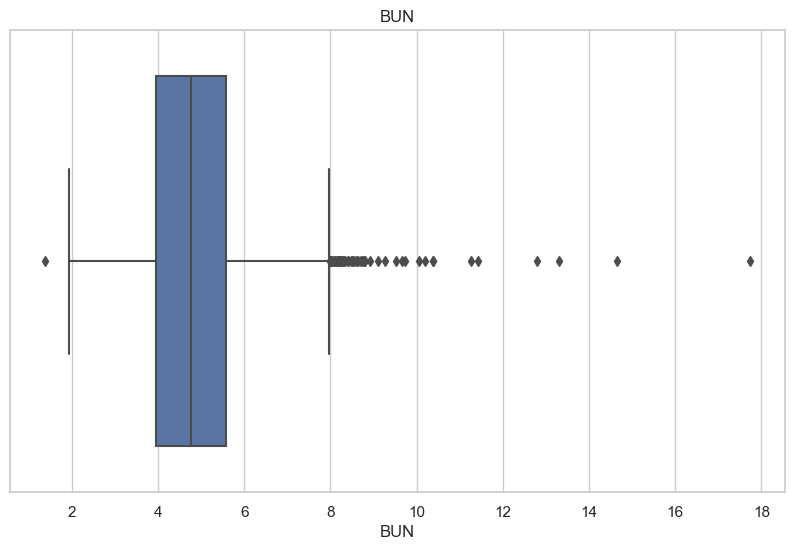

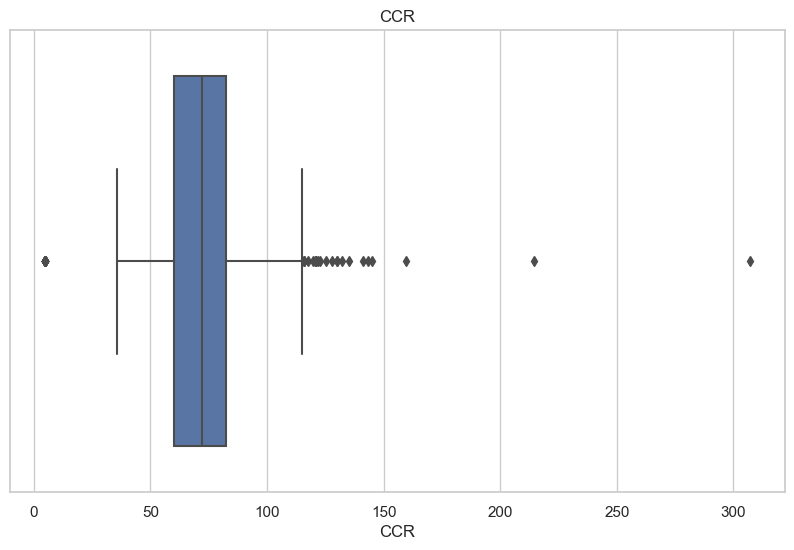

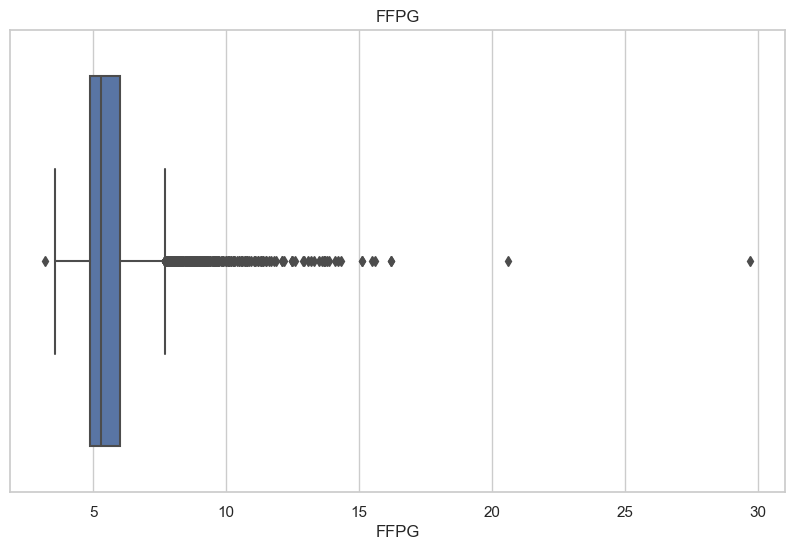

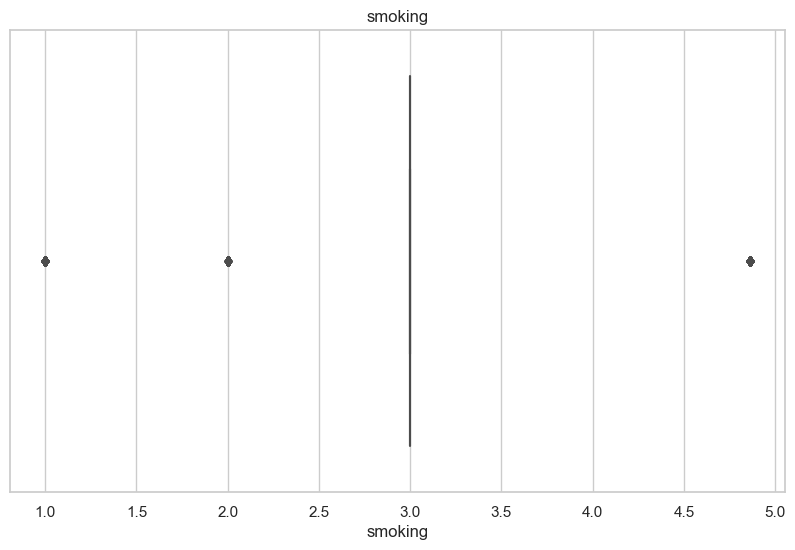

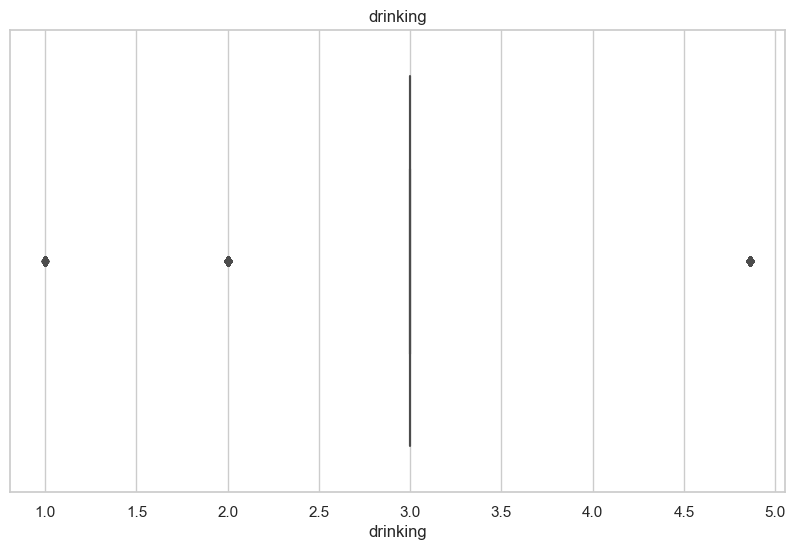

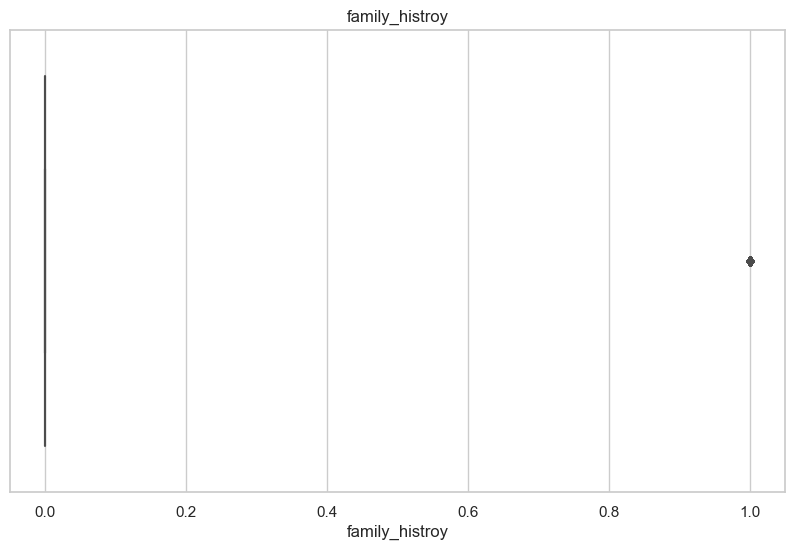

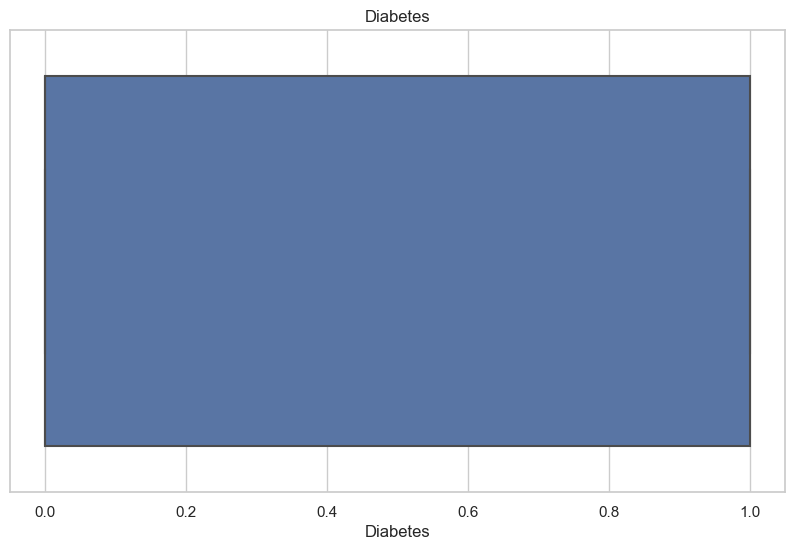

In [26]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Loop through each feature in your dataframe
for column in df.columns:
    # Create a figure and a set of subplots
    plt.figure(figsize=(10, 6))
    
    # Create a boxplot for each feature
    sns.boxplot(x=df[column])
    
    # Set the title of the plot as the feature name
    plt.title(column)
    
    # Display the plot
    plt.show()

Our analysis reveals the presence of strong positive outliers in features numbered 3 through 14, with the exception of feature 6, which represents Fasting Plasma Glucose levels. Here, we observe the occurrence of negative outliers. While these outliers, have the potential to introduce variability and influence the overall analysis results, we have opted to retain these within our dataset at this juncture. The decision stems from our cautious approach, ensuring that we do not inadvertently compromise the integrity and comprehensiveness of our data by excluding potentially significant points. We recognize that outliers, while occasionally distortive, can also hold valuable information and provide insights into unique or extreme cases within the studied phenomena.

However, we remain acutely aware of the existence of these outliers and the possible implications they may have on the performance and accuracy of our classifiers. Our approach is adaptive and pragmatic – should we encounter challenges or inconsistencies in the application of our classifiers, we are prepared to reassess their inclusion. Revisiting and potentially adjusting these features by removing outliers would be a considered step to mitigate any distortive impact and enhance the reliability of our model.

### Handling Missing Values

The identification and apt handling of missing values is crucial to prevent model degradation. We will discern the pattern of missingness and apply suitable imputation methods or deletion to handle it, if missing values exist.

In [18]:
# Check for missing values
print(df.isnull().sum())

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64


Thankfully, no missing values exist!

### Correlation
Understanding the relationships between features and their significance is vital before applying any classifiers. If features are strongly correlated, we can decrease the dimensionality by simpling dropping some of the correlated features. A correlation matrix will unveil the linear relationships between features, guiding feature selection.

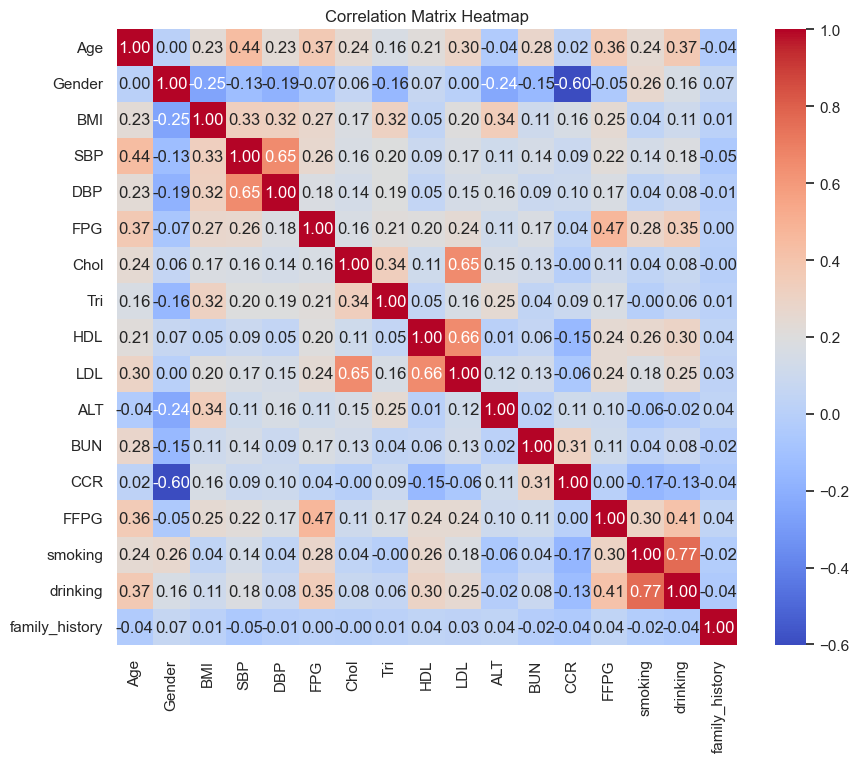

In [29]:
correlation_matrix = df.drop('Diabetes', axis = 1).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

We observe discernible positive correlations between several sets of variables: smoking and drinking, SBP (Systolic Blood Pressure) and DBP (Diastolic Blood Pressure), and LDL (Low-Density Lipoprotein) and HDL (High-Density Lipoprotein) cholesterol levels. Additionally, our analysis reveals a negative correlation between creatinine clearance and age, suggesting that as age increases, the efficiency of the kidneys in clearing creatinine decreases.

Upon closer inspection of the data, the positive correlation between smoking and drinking suggests a potential lifestyle pattern, while the correlation between SBP and DBP is expected, given their physiological relationship. The correlation between LDL and HDL cholesterol levels is also noteworthy, as they are both crucial indicators of cardiovascular health. Similarly, the negative correlation between creatinine clearance and age is consistent with existing medical knowledge, indicating reduced renal function with advancing age.

Despite the presence of these correlations, a thorough analysis of the strength and impact of each correlation in our study reveals that they are not sufficiently robust to justify omitting any of the features from our analysis. Retaining these features is crucial, as each provides unique insights and contributes to the comprehensiveness and depth of our study. Moreover, the relationships between the features, while evident, are not deterministic, and removing one could potentially lead to a loss of valuable information and reduce the reliability and validity of our findings.

In conclusion, while we acknowledge the existence of these correlations, we advocate for the retention of all features in our dataset to ensure a holistic and nuanced understanding of the underlying patterns and relationships